### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
import generate_stop_dataframe as gen_stop
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import matplotlib.pyplot as plt

data_dir = "./Data/"


/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-11-08 13:31:46,175	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 172.25.4.204:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
#seed = 7915966
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

3140147
[45 24 19 28  2 48 49 46 13 26]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 3.5, # 3 instead? how much stimulus the LIP gets at maximum
    'stop_signal_present':False,
    'stop_signal_probability':1.0, # probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude':2.0, # ampitude of the stop signal over base line
    'stop_signal_onset':200., # in ms
    'stop_signal_channel': "any", # "all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=12135) begin GenStopSchedule
(pid=12135) begin GenStopSchedule
(pid=12135) <class 'float'>
(pid=12135) [2 0 1]
(pid=12135) stop_df
(pid=12135)    stop_signal_present  stop_signal_probability stop_signal_channel
(pid=12135) 0                 True                      1.0                 any
(pid=12135) stop_channels_df
(pid=12135)     left  right  trial_num
(pid=12135) 0   True  False          0
(pid=12135) 1  False   True          1
(pid=12135) 2   True  False          2
(pid=12135) <class 'float'>
(pid=12135) [2 0 1]
(pid=12135) stop_df
(pid=12135)    stop_signal_present  stop_signal_probability stop_signal_channel
(pid=12135) 0                 True                      1.0                 any
(pid=12135) stop_channels_df
(pid=12135)     left  right  trial_num
(pid=12135) 0   True  False          0
(pid=12135) 1  False   True          1
(pid=12135) 2   True  False          2
(pid=12135) 2 4 0.161666`
(pid=12135) 2 4 0.161666`
(pid=12135) 3 5 0.161666`
(pid=12135) 3 5 0.161666`
(p

(pid=12135) phasetimer 301
(pid=12135) globaltimer 2401
(pid=12135)   action
(pid=12135) 0   left
(pid=12135) 1  right
(pid=12135) chosen_action right
(pid=12135) phasetimer 301
(pid=12135) globaltimer 2401
(pid=12135)   action
(pid=12135) 0   left
(pid=12135) 1  right
(pid=12135) chosen_action right


In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_channel', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onset_df', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [30]:
cbgt.saveResults(results,data_dir+'network_data_'+str(seed),['popfreqs','popdata'])

In [12]:
results[0]["stop_df"]

,stop_signal_present,stop_signal_probability,stop_signal_channel
0,True,1.0,any


In [13]:
results[0]["stop_amplitude_df"]

,left,right,trial_num
0,2.0,2.0,0
1,2.0,2.0,1
2,2.0,2.0,2


In [14]:
results[0]["stop_onset_df"]

,left,right,trial_num
0,200.0,200.0,0
1,200.0,200.0,1
2,200.0,200.0,2


In [15]:
results[0]["stop_channels_df"]

,left,right,trial_num
0,True,False,0
1,False,True,1
2,True,False,2


In [16]:
results[0]['actionchannels']

,action
0,left
1,right


In [17]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


In [20]:
firing_rates, reward_q_df, performance, rt_dist = plt_help.extract_relevant_frames(results,seed)

[   index  Trials variable     value      data_type       seed  n_trials  \
0    4.0      -1     left  0.500000           Q_df  3140147_0       3.0   
1    5.0       0     left  0.500000           Q_df  3140147_0       3.0   
2    6.0       1     left  0.500000           Q_df  3140147_0       3.0   
3    7.0       2     left  0.500000           Q_df  3140147_0       3.0   
4    8.0      -1    right  0.500000           Q_df  3140147_0       3.0   
5    9.0       0    right  0.275000           Q_df  3140147_0       3.0   
6   10.0       1    right  0.151250           Q_df  3140147_0       3.0   
7   11.0       2    right  0.083187           Q_df  3140147_0       3.0   
0    NaN       0     left  0.999487      reward_df  3140147_0       3.0   
1    NaN       1     left  1.074667      reward_df  3140147_0       3.0   
2    NaN       2     left  0.966838      reward_df  3140147_0       3.0   
3    NaN       0    right  0.000000      reward_df  3140147_0       3.0   
4    NaN       1    righ

In [21]:
reward_q_df[0]

,index,Trials,variable,value,data_type,seed,n_trials,volatility,conflict
0,4.0,-1,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
1,5.0,0,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
2,6.0,1,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
3,7.0,2,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
4,8.0,-1,right,0.500000,Q_df,3140147_0,3.0,1.0,0.7
5,9.0,0,right,0.275000,Q_df,3140147_0,3.0,1.0,0.7
6,10.0,1,right,0.151250,Q_df,3140147_0,3.0,1.0,0.7
7,11.0,2,right,0.083187,Q_df,3140147_0,3.0,1.0,0.7
0,NaN,0,left,0.999487,reward_df,3140147_0,3.0,1.0,0.7
1,NaN,1,left,1.074667,reward_df,3140147_0,3.0,1.0,0.7


In [22]:
results[0]['block']

array(['left', 'left', 'right'], dtype='<U5')

In [23]:
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,69.333333,71.555556,25.800000,24.622222,61.266667,62.822222,2.888889,1.555556,2.888889,4.000000,0.0,0.0,8.000000,4.222222,7.777778,0.0,0
1,67.777778,72.666667,25.733333,24.733333,61.688889,62.466667,2.666667,1.555556,2.888889,3.555556,0.0,0.0,8.000000,4.000000,7.333333,0.0,1
2,67.333333,73.777778,25.644444,24.688889,61.800000,63.155556,2.666667,1.777778,2.666667,3.111111,0.0,0.0,7.555556,4.000000,7.555556,0.0,2
3,67.777778,73.111111,25.800000,24.755556,62.044444,63.511111,2.888889,1.777778,2.666667,3.111111,0.0,0.0,8.222222,4.000000,7.555556,0.0,3
4,66.888889,73.111111,25.644444,24.622222,61.844444,63.488889,2.888889,1.777778,2.666667,3.111111,0.0,0.0,8.222222,3.777778,8.444444,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,67.777778,69.777778,24.800000,24.333333,64.044444,62.311111,2.222222,2.000000,2.000000,2.444444,0.0,0.0,5.333333,6.888889,8.000000,0.0,2998
2999,68.222222,69.555556,24.800000,24.511111,63.955556,62.511111,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.333333,6.888889,8.666667,0.0,2999
3000,69.333333,69.777778,24.755556,24.444444,63.844444,62.222222,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.777778,6.666667,8.444444,0.0,3000
3001,69.777778,70.666667,24.600000,24.377778,63.955556,62.022222,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.777778,6.666667,8.222222,0.0,3001


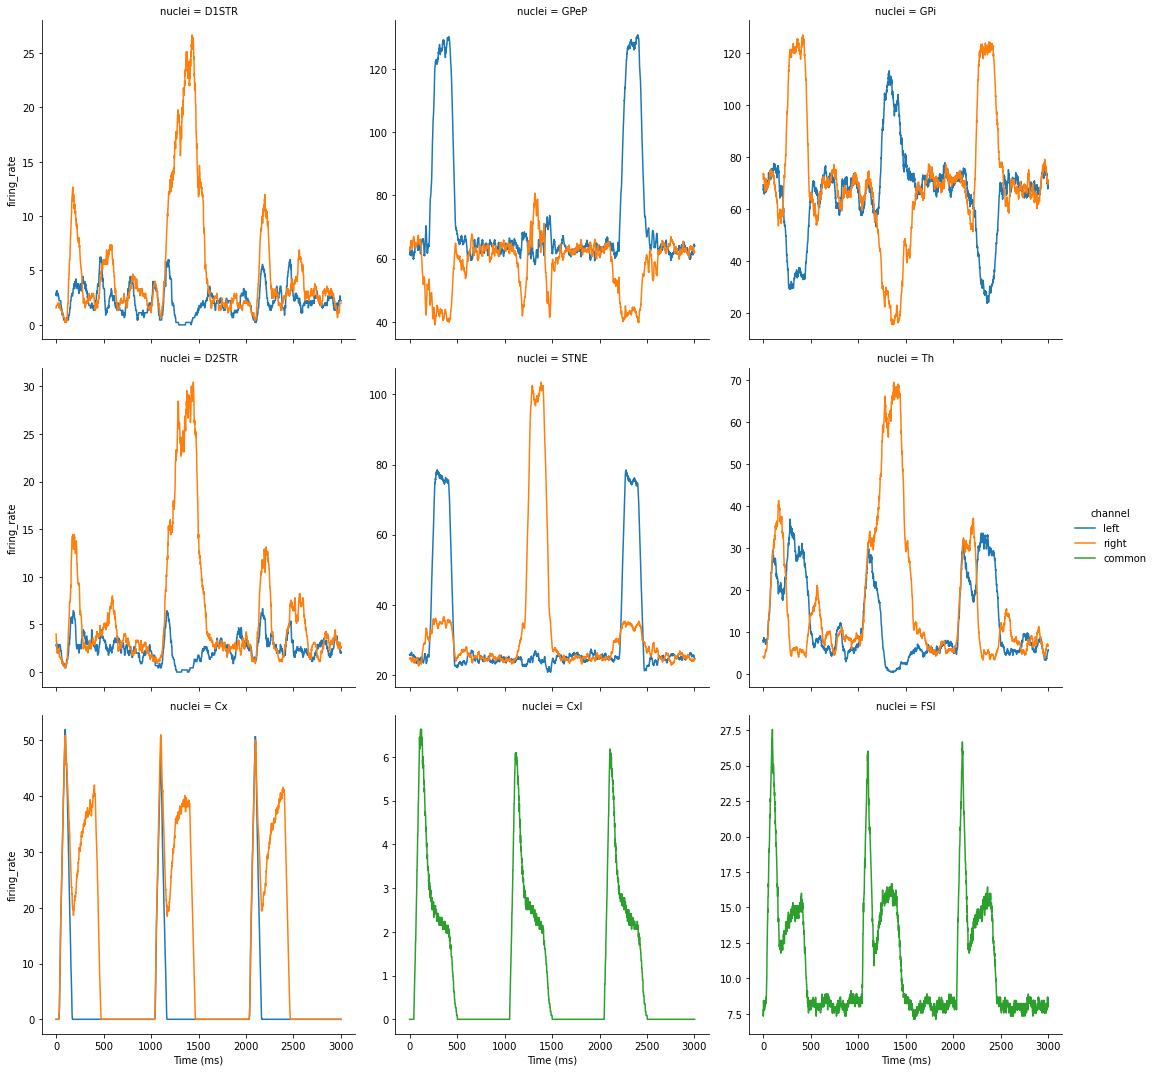

In [24]:
# You can smoothen the FR by sending smooth=True, default: smooth=False
#plt_func.plot_fr(results[0],smooth=True)
plt_func.plot_fr(firing_rates,seed)


In [25]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [27]:
reward_q_df[0]

,index,Trials,variable,value,data_type,seed,n_trials,volatility,conflict
0,4.0,-1,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
1,5.0,0,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
2,6.0,1,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
3,7.0,2,left,0.500000,Q_df,3140147_0,3.0,1.0,0.7
4,8.0,-1,right,0.500000,Q_df,3140147_0,3.0,1.0,0.7
5,9.0,0,right,0.275000,Q_df,3140147_0,3.0,1.0,0.7
6,10.0,1,right,0.151250,Q_df,3140147_0,3.0,1.0,0.7
7,11.0,2,right,0.083187,Q_df,3140147_0,3.0,1.0,0.7
0,NaN,0,left,0.999487,reward_df,3140147_0,3.0,1.0,0.7
1,NaN,1,left,1.074667,reward_df,3140147_0,3.0,1.0,0.7


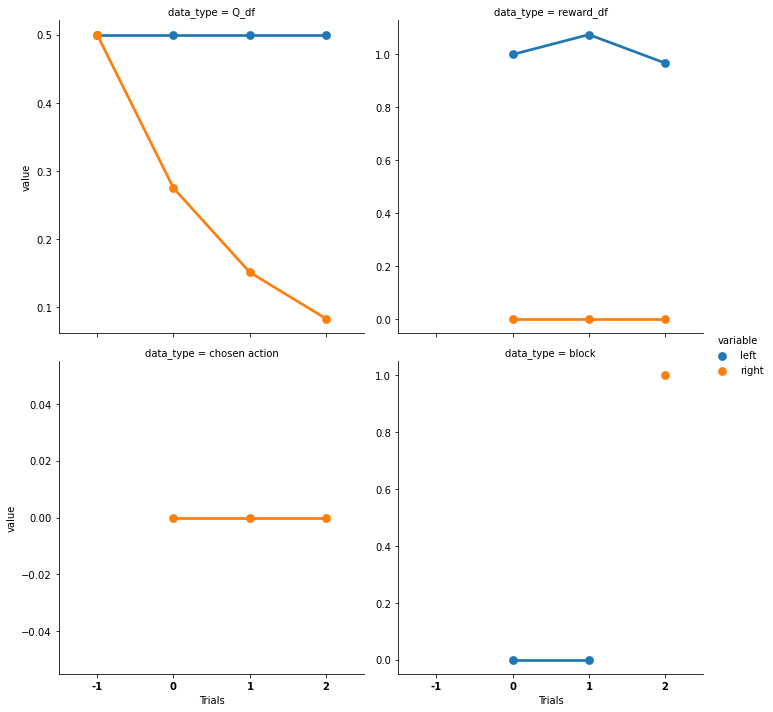

In [28]:
plt_func.plot_reward_Q_df(reward_q_df)

In [31]:
savedresults = cbgt.loadResults(data_dir+'network_data_'+str(seed))
savedresults[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,69.333333,71.555556,25.800000,24.622222,61.266667,62.822222,2.888889,1.555556,2.888889,4.000000,0.0,0.0,8.000000,4.222222,7.777778,0.0,0
1,67.777778,72.666667,25.733333,24.733333,61.688889,62.466667,2.666667,1.555556,2.888889,3.555556,0.0,0.0,8.000000,4.000000,7.333333,0.0,1
2,67.333333,73.777778,25.644444,24.688889,61.800000,63.155556,2.666667,1.777778,2.666667,3.111111,0.0,0.0,7.555556,4.000000,7.555556,0.0,2
3,67.777778,73.111111,25.800000,24.755556,62.044444,63.511111,2.888889,1.777778,2.666667,3.111111,0.0,0.0,8.222222,4.000000,7.555556,0.0,3
4,66.888889,73.111111,25.644444,24.622222,61.844444,63.488889,2.888889,1.777778,2.666667,3.111111,0.0,0.0,8.222222,3.777778,8.444444,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,67.777778,69.777778,24.800000,24.333333,64.044444,62.311111,2.222222,2.000000,2.000000,2.444444,0.0,0.0,5.333333,6.888889,8.000000,0.0,2998
2999,68.222222,69.555556,24.800000,24.511111,63.955556,62.511111,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.333333,6.888889,8.666667,0.0,2999
3000,69.333333,69.777778,24.755556,24.444444,63.844444,62.222222,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.777778,6.666667,8.444444,0.0,3000
3001,69.777778,70.666667,24.600000,24.377778,63.955556,62.022222,2.222222,2.000000,2.000000,2.666667,0.0,0.0,5.777778,6.666667,8.222222,0.0,3001


In [32]:
datatables = cbgt.collateVariable(results,'datatables')

In [33]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,107,107,408,408,left,0.0
1,right,1009,1102,93,394,1403,left,0.0
2,right,2004,2100,96,397,2401,right,0.0


Pooling data
['9971107', '6050185', '5139087', '7915966', '6095952', '6929817', '534602', '3140147']


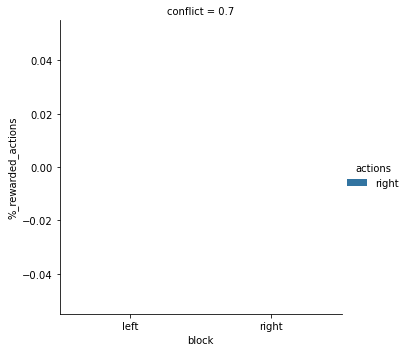

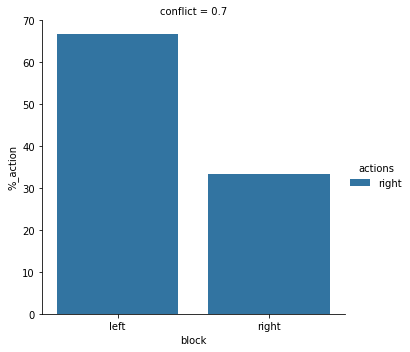

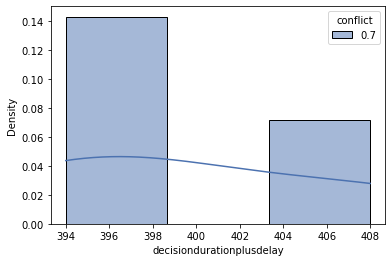

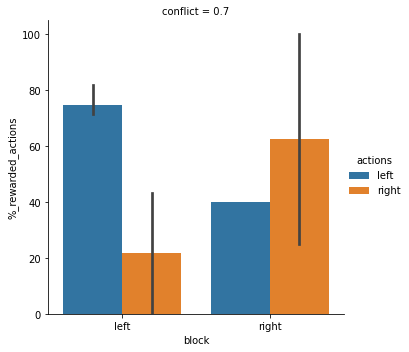

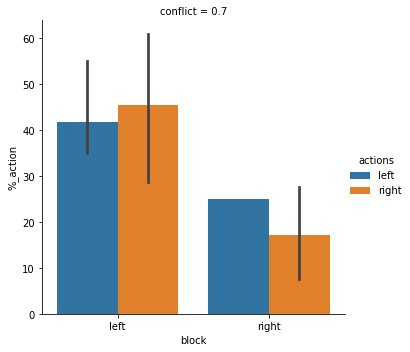

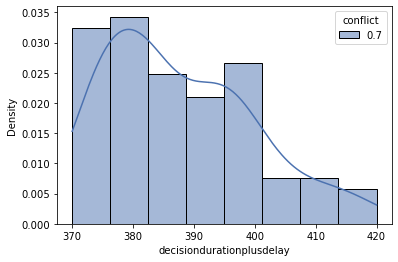

In [34]:
plt_func.performance_all(performance,rt_dist)
# To plot performance and rt distributions for all the simulations you have run so far, call performance_all with empty lists
# Pools data over seeds and plots the performance
plt_func.performance_all([],[])

    

In [35]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

,n_trials,volatility,conflict
0,3,1,0.7


In [36]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [37]:
popdata = cbgt.collateVariable(results,'popdata')

In [38]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

10    10
11    11
Name: column, dtype: int64

In [ ]:
plt.plot(popfreqs[0].iloc[:,7])
plt.plot(popfreqs[0].iloc[:,8])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 